In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import numpy as np
import statsmodels.api as sm 
from statsmodels.tsa.vector_ar.var_model import VAR
tsa = sm.tsa

%matplotlib inline

In [2]:
data = pd.read_csv('../../lesson-15/assets/dataset/rossmann.csv', low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


(-4.3747836125811936,
 0.00032886553525138343,
 21,
 920,
 {'1%': -3.4374778690219956,
  '10%': -2.5684454926748583,
  '5%': -2.8646866842175558},
 15684.656171689703)

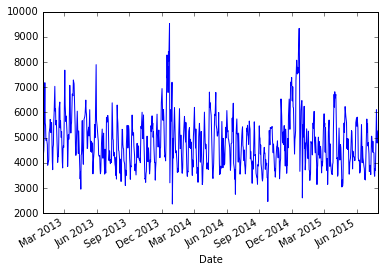

In [4]:
# Filter to Store 1
store1_data = data[data.Store == 1]

# Filter to open days
store1_open_data = store1_data[store1_data.Open==1]

store1_open_data.Sales.plot()
tsa.adfuller(store1_data.Sales)

In [123]:
import numpy as np
import statsmodels.api as sm 
tsa = sm.tsa # as shorthand
mdata = sm.datasets.macrodata.load().data
endog = np.log(mdata['m1'])
exog = np.column_stack([np.log(mdata['realgdp']),
                        np.log(mdata['cpi'])])
exog = sm.add_constant(exog, prepend=True)
res1 = sm.OLS(endog, exog).fit()

In [22]:
acf, Q, pvalue = tsa.acf(res1.resid, nlags=4, qstat=True,unbiased=True) 

acf
pvalue

array([ 1.        ,  0.98234045,  0.94759323,  0.90362911,  0.84956461])

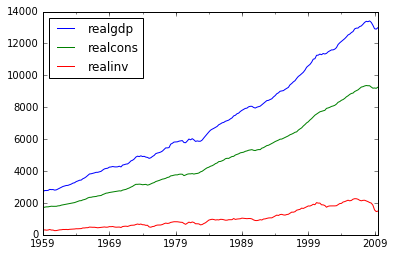

In [137]:
mdata.plot()

Dickey-Fuller test

In [138]:
tsa.adfuller(mdata.realgdp.values, regression="ct")

(-1.2317718968009106,
 0.90378758186510533,
 12,
 190,
 {'1%': -4.0072249329348297,
  '10%': -3.1407704096807114,
  '5%': -3.4338542883802301},
 2034.0982863559145)

asdfa

In [127]:
from statsmodels.tsa.vector_ar.var_model import VAR

mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)


In [148]:
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()


In [149]:
model = VAR(data)


In [152]:
results=model.fit(3)

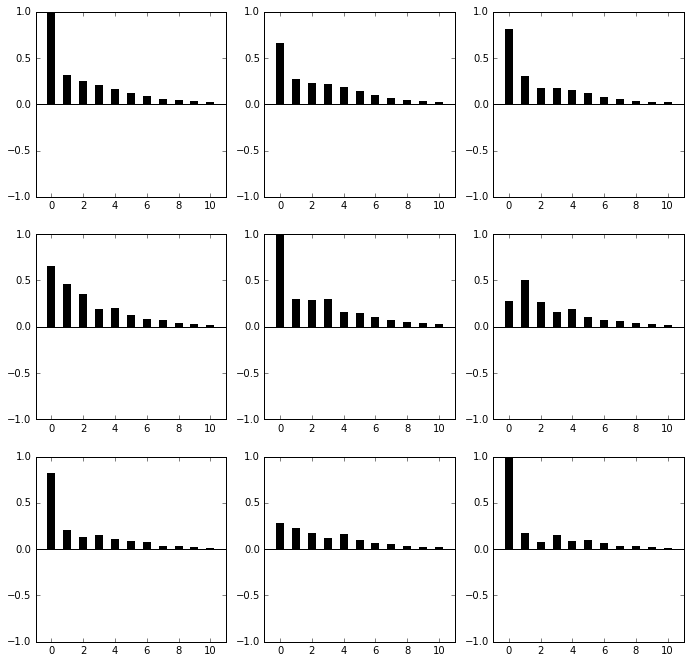

In [155]:
results.plot_acorr()
#model.select_order(15)

In [143]:
#plot_acf(res.resid, lags=50)
res.resid
tsa.acf(res1.resid, nlags=4, qstat=True,unbiased=True)

AttributeError: 'tuple' object has no attribute 'plt'

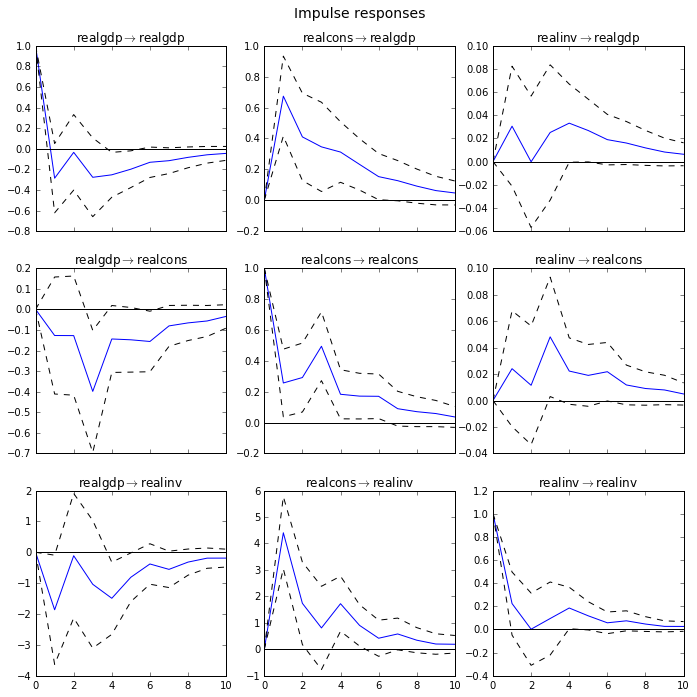

In [160]:
##Impulse responses can be generated and plotted thusly:
irf = results.irf(10) # 10 periods
irf.plot()


In [201]:
##n-step ahead forecasts can similarly be generated and plotted: 
results.plot_forecast??
##The forecast error variance decomposition can also be computed and plotted like so
#results.fevd().plot()

In [173]:
##testing Granger causality can be carried out using the results object:
results.test_causality('realgdp',['realcons', 'realinv'])

Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         6.999888         2.114554            0.000  (6, 567)
H_0: ['realcons', 'realinv'] do not Granger-cause realgdp
Conclusion: reject H_0 at 5.00% significance level


{'conclusion': 'reject',
 'crit_value': 2.1145543864563141,
 'df': (6, 567),
 'pvalue': 3.3805963773887378e-07,
 'signif': 0.05,
 'statistic': 6.9998875522543536}

In [70]:
VAR??

In [168]:
mdata.colums

Index([u'realgdp', u'realcons', u'realinv'], dtype='object')

In [178]:
pd.DataFrame(results.resid, columns=list(mdata.columns))

,realgdp,realcons,realinv
1960-03-31,0.016715,0.001271,0.112993
1960-06-30,-0.010305,0.003840,-0.105387
1960-09-30,-0.008108,-0.011134,-0.030723
1960-12-31,-0.015052,-0.005031,-0.100613
1961-03-31,0.003314,-0.005423,0.050591
1961-06-30,0.017493,0.011760,0.089919
1961-09-30,0.007295,-0.002353,0.053459
1961-12-31,0.014735,0.013326,0.017724
1962-03-31,0.007429,0.000380,0.031692
1962-06-30,0.000727,0.003496,-0.032336


In [176]:
pd.DataFrame??

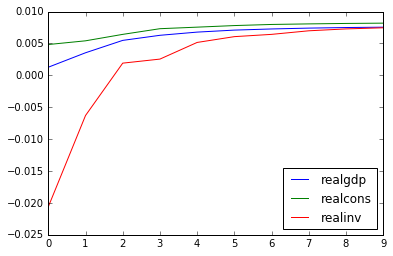

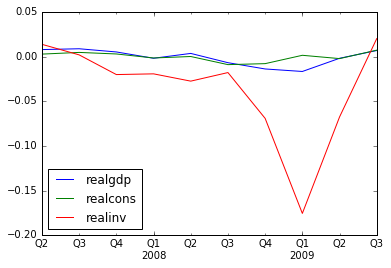

In [203]:
pd.DataFrame(results.forecast(np.array(data[-10:], np.int32),10),columns=list(data.columns)).plot()
data[-10:].plot()

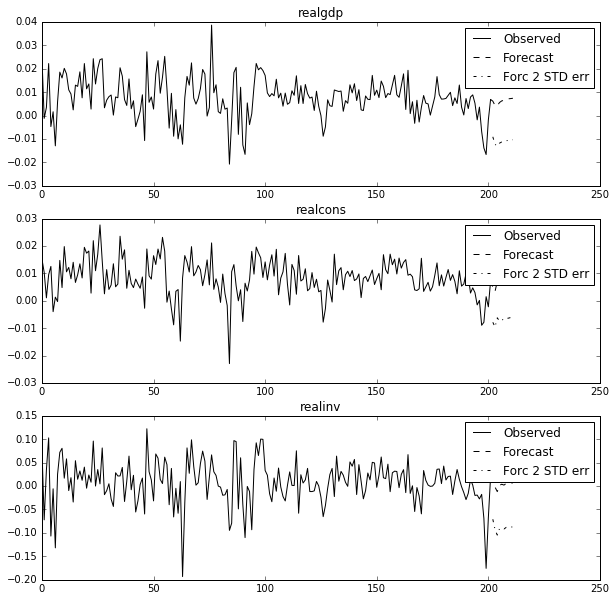

In [200]:
results.plot_forecast(10)